In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

Спрогнозировать какие будут убытки по программе


1- клиника


2- стоматология

In [2]:
from google.colab import output
output.enable_custom_widget_manager()

In [3]:
df = pd.read_csv('data_for_projects.csv', delimiter = ',')

In [4]:
df[['program_id', 'age_group']] = df[['program_id', 'age_group']].apply(
    lambda x: pd.factorize(x)[0])
df[' target '] = pd.to_numeric(df[' target '],errors='coerce')
df = df.drop('program_id', axis = 1)

In [5]:
clinic = df[(df['service_type_id'] == 1)]

In [6]:
clinic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3040 entries, 0 to 5046
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_city_group           2158 non-null   float64
 1   age_group                    3040 non-null   int64  
 2   gender_group                 1557 non-null   float64
 3   service_type_id              3040 non-null   int64  
 4   distance_min                 1709 non-null   float64
 5   cpr_max                      2738 non-null   float64
 6   cpr_mean                     2738 non-null   float64
 7   cpr_median                   2738 non-null   float64
 8   cpr_std                      1918 non-null   float64
 9   cpr_min                      2738 non-null   float64
 10  cpr_region                   3040 non-null   float64
 11  number_of_clinics_in_progam  3040 non-null   int64  
 12  clinic_franchise             299 non-null    float64
 13   target           

In [7]:
clinic = clinic.drop('airflow_avg_max', axis = 1)
clinic = clinic.drop('airflow_avg_mean', axis = 1)
clinic = clinic.drop('airflow_avg_min', axis = 1)

clinic = clinic.drop('dent_plomb_avg_max', axis = 1)
clinic = clinic.drop('dent_plomb_avg_mean', axis = 1)
clinic = clinic.drop('dent_plomb_avg_min', axis = 1)

clinic = clinic.drop('dent_remov_avg_max', axis = 1)
clinic = clinic.drop('dent_remov_avg_mean', axis = 1)
clinic = clinic.drop('dent_remov_avg_min', axis = 1)

clinic = clinic.drop('dent_usonic_avg_max', axis = 1)
clinic = clinic.drop('dent_usonic_avg_mean', axis = 1)
clinic = clinic.drop('dent_usonic_avg_min', axis = 1)

clinic = clinic.drop('visit_dent_avg_max', axis = 1)
clinic = clinic.drop('visit_dent_avg_mean', axis = 1)
clinic = clinic.drop('visit_dent_avg_min', axis = 1)

In [9]:
clinic = clinic.fillna(0)

In [10]:
dentistry = df[(df['service_type_id'] == 2)]

In [11]:
dentistry

,program_city_group,age_group,gender_group,service_type_id,distance_min,cpr_max,cpr_mean,cpr_median,cpr_std,cpr_min,...,visit_neur_avg_min,visit_neuro_avg_max,visit_neuro_avg_mean,visit_neuro_avg_min,visit_oft_avg_max,visit_oft_avg_mean,visit_oft_avg_min,visit_surg_avg_max,visit_surg_avg_mean,visit_surg_avg_min
1,2.0,0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.0,0,1.0,2,NaN,3.741448,3.485539,3.485539,0.361910,3.229630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0,1.0,2,358.981,4.417630,4.417630,4.417630,NaN,4.417630,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0,NaN,2,358.981,3.961450,3.961450,3.961450,NaN,3.961450,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,2.0,1,NaN,2,1191767.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,NaN,0,1.0,2,NaN,4.953747,4.946500,3.828477,0.575326,3.453195,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5035,NaN,0,NaN,2,NaN,5.655350,4.169271,4.174785,1.916850,2.639827,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5041,2.0,0,1.0,2,NaN,3.678945,3.532935,3.532935,0.264950,3.386920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5043,2.0,0,NaN,2,NaN,3.495655,3.495655,3.495655,NaN,3.495655,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dentistry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 1 to 5044
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_city_group           1530 non-null   float64
 1   age_group                    2007 non-null   int64  
 2   gender_group                 973 non-null    float64
 3   service_type_id              2007 non-null   int64  
 4   distance_min                 1125 non-null   float64
 5   cpr_max                      1089 non-null   float64
 6   cpr_mean                     1089 non-null   float64
 7   cpr_median                   1089 non-null   float64
 8   cpr_std                      691 non-null    float64
 9   cpr_min                      1089 non-null   float64
 10  cpr_region                   2007 non-null   float64
 11  number_of_clinics_in_progam  2007 non-null   int64  
 12  clinic_franchise             869 non-null    float64
 13   target           

In [13]:
dentistry = dentistry.drop('analysis_urin_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_urin_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_urin_avg_min', axis = 1)

dentistry = dentistry.drop('analysis_blood_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_blood_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_blood_avg_min', axis = 1)

dentistry = dentistry.drop('analysis_copro_avg_max', axis = 1)
dentistry = dentistry.drop('analysis_copro_avg_mean', axis = 1)
dentistry = dentistry.drop('analysis_copro_avg_min', axis = 1)

dentistry = dentistry.drop('anestesy_avg_max', axis = 1)
dentistry = dentistry.drop('anestesy_avg_mean', axis = 1)
dentistry = dentistry.drop('anestesy_avg_min', axis = 1)

dentistry = dentistry.drop('anti_hcv_avg_max', axis = 1)
dentistry = dentistry.drop('anti_hcv_avg_mean', axis = 1)
dentistry = dentistry.drop('anti_hcv_avg_min', axis = 1)

dentistry = dentistry.drop('doctor_visit_avg_max', axis = 1)
dentistry = dentistry.drop('doctor_visit_avg_mean', axis = 1)
dentistry = dentistry.drop('doctor_visit_avg_min', axis = 1)

dentistry = dentistry.drop('massage_avg_max', axis = 1)
dentistry = dentistry.drop('massage_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_avg_min', axis = 1)

dentistry = dentistry.drop('massage_int_avg_max', axis = 1)
dentistry = dentistry.drop('massage_int_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_int_avg_min', axis = 1)

dentistry = dentistry.drop('massage_neck_avg_max', axis = 1)
dentistry = dentistry.drop('massage_neck_avg_mean', axis = 1)
dentistry = dentistry.drop('massage_neck_avg_min', axis = 1)

dentistry = dentistry.drop('usound_ginec_avg_max', axis = 1)
dentistry = dentistry.drop('usound_ginec_avg_mean', axis = 1)
dentistry = dentistry.drop('usound_ginec_avg_min', axis = 1)

dentistry = dentistry.drop('usound_shield_avg_max', axis = 1)
dentistry = dentistry.drop('usound_shield_avg_mean', axis = 1)
dentistry = dentistry.drop('usound_shield_avg_min', axis = 1)

dentistry = dentistry.drop('visit_card_avg_max', axis = 1)
dentistry = dentistry.drop('visit_card_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_card_avg_min', axis = 1)

dentistry = dentistry.drop('visit_gastr_avg_max', axis = 1)
dentistry = dentistry.drop('visit_gastr_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_gastr_avg_min', axis = 1)

dentistry = dentistry.drop('visit_genic_avg_max', axis = 1)
dentistry = dentistry.drop('visit_genic_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_genic_avg_min', axis = 1)

dentistry = dentistry.drop('visit_lor_avg_max', axis = 1)
dentistry = dentistry.drop('visit_lor_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_lor_avg_min', axis = 1)

dentistry = dentistry.drop('visit_neur_avg_max', axis = 1)
dentistry = dentistry.drop('visit_neur_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_neur_avg_min', axis = 1)

dentistry = dentistry.drop('visit_neuro_avg_max', axis = 1)
dentistry = dentistry.drop('visit_neuro_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_neuro_avg_min', axis = 1)

dentistry = dentistry.drop('visit_oft_avg_max', axis = 1)
dentistry = dentistry.drop('visit_oft_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_oft_avg_min', axis = 1)

dentistry = dentistry.drop('visit_surg_avg_max', axis = 1)
dentistry = dentistry.drop('visit_surg_avg_mean', axis = 1)
dentistry = dentistry.drop('visit_surg_avg_min', axis = 1)

In [14]:
dentistry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 1 to 5044
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_city_group           1530 non-null   float64
 1   age_group                    2007 non-null   int64  
 2   gender_group                 973 non-null    float64
 3   service_type_id              2007 non-null   int64  
 4   distance_min                 1125 non-null   float64
 5   cpr_max                      1089 non-null   float64
 6   cpr_mean                     1089 non-null   float64
 7   cpr_median                   1089 non-null   float64
 8   cpr_std                      691 non-null    float64
 9   cpr_min                      1089 non-null   float64
 10  cpr_region                   2007 non-null   float64
 11  number_of_clinics_in_progam  2007 non-null   int64  
 12  clinic_franchise             869 non-null    float64
 13   target           

In [15]:
dentistry = dentistry.fillna(0)

# **Models**

# **CatBoost + GridSearch**


# **Clinic**

In [16]:
plt.rcParams["figure.figsize"] = (10,10)

In [17]:
clinic_X = clinic.loc[:, clinic.columns != ' target ']
clinic_y = clinic.loc[:,' target ']

In [18]:
from sklearn.model_selection import train_test_split

X_train_clinic, X_test_clinic, y_train_clinic, y_test_clinic = train_test_split(clinic_X, clinic_y, 
                                                    train_size=0.8, 
                                                    random_state=42)

In [22]:
import catboost as cb

In [23]:
train_dataset_clinic = cb.Pool(X_train_clinic, y_train_clinic) 
test_dataset_clinic = cb.Pool(X_test_clinic, y_test_clinic)

In [24]:
model_clinic = cb.CatBoostRegressor(loss_function='RMSE')

In [25]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

model_clinic.grid_search(grid, train_dataset_clinic)

Выходные данные были обрезаны до нескольких последних строк (5000).
61:	learn: 39.9789935	test: 54.6245180	best: 51.1251726 (19)	total: 757ms	remaining: 1.68s
62:	learn: 39.8645955	test: 54.5749002	best: 51.1251726 (19)	total: 768ms	remaining: 1.67s
63:	learn: 39.6973882	test: 54.8689300	best: 51.1251726 (19)	total: 779ms	remaining: 1.65s
64:	learn: 39.5788594	test: 54.9090361	best: 51.1251726 (19)	total: 790ms	remaining: 1.64s
65:	learn: 39.4634621	test: 54.9075048	best: 51.1251726 (19)	total: 801ms	remaining: 1.63s
66:	learn: 39.3864498	test: 54.9394847	best: 51.1251726 (19)	total: 812ms	remaining: 1.61s
67:	learn: 39.2951358	test: 54.9453375	best: 51.1251726 (19)	total: 824ms	remaining: 1.6s
68:	learn: 39.2484405	test: 54.9502618	best: 51.1251726 (19)	total: 835ms	remaining: 1.58s
69:	learn: 39.1897374	test: 54.9597685	best: 51.1251726 (19)	total: 845ms	remaining: 1.57s
70:	learn: 39.1154537	test: 55.0556871	best: 51.1251726 (19)	total: 856ms	remaining: 1.55s
71:	learn: 39.0814736	t

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [26]:
model_clinic.fit(X_train_clinic, y_train_clinic)

0:	learn: 61.5474048	total: 6.04ms	remaining: 598ms
1:	learn: 60.2175356	total: 10.8ms	remaining: 529ms
2:	learn: 59.0520091	total: 15.5ms	remaining: 500ms
3:	learn: 57.9355811	total: 20.1ms	remaining: 483ms
4:	learn: 57.0166186	total: 25.9ms	remaining: 493ms
5:	learn: 56.1402049	total: 30.6ms	remaining: 479ms
6:	learn: 55.5409344	total: 35.2ms	remaining: 468ms
7:	learn: 54.8516574	total: 39.7ms	remaining: 456ms
8:	learn: 54.4130270	total: 44.4ms	remaining: 449ms
9:	learn: 53.7517524	total: 49.1ms	remaining: 442ms
10:	learn: 53.2278418	total: 53.7ms	remaining: 435ms
11:	learn: 52.7388592	total: 58.7ms	remaining: 430ms
12:	learn: 52.3286167	total: 64ms	remaining: 429ms
13:	learn: 51.8402570	total: 68.9ms	remaining: 423ms
14:	learn: 51.4784540	total: 74ms	remaining: 420ms
15:	learn: 51.1387801	total: 79ms	remaining: 415ms
16:	learn: 50.8172669	total: 84ms	remaining: 410ms
17:	learn: 50.5722026	total: 89ms	remaining: 405ms
18:	learn: 50.3311743	total: 94.1ms	remaining: 401ms
19:	learn: 50

In [27]:
y_pred_clinic = model_clinic.predict(X_test_clinic)

In [28]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test_clinic, y_pred_clinic), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test_clinic, y_pred_clinic), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test_clinic, y_pred_clinic)), 4))
print("R^2   ", round(metrics.r2_score(y_test_clinic, y_pred_clinic), 4))

MAE:   26.3648
MSE:   3144.8214
RMSE:  56.0787
R^2    0.2509


Text(0.5, 0, 'CatBoost Feature Importance')

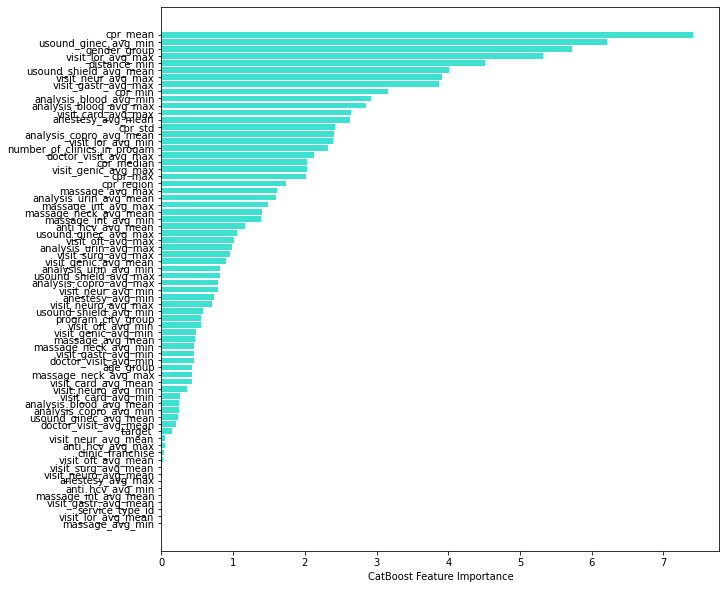

In [29]:
sorted_feature_importance = model_clinic.feature_importances_.argsort()
plt.barh(clinic.columns[sorted_feature_importance], 
        model_clinic.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# **Dentistry**

In [30]:
dentistry_X = dentistry.loc[:, dentistry.columns != ' target ']
dentistry_y = dentistry.loc[:,' target ']

X_train_dentistry, X_test_dentistry, y_train_dentistry, y_test_dentistry = train_test_split(dentistry_X, dentistry_y, 
                                                    train_size=0.8, 
                                                    random_state=42)

train_dataset_dentistry = cb.Pool(X_train_dentistry, y_train_dentistry) 
test_dataset_dentistry = cb.Pool(X_test_dentistry, y_test_dentistry)

model_dentistry = cb.CatBoostRegressor(loss_function='RMSE')

In [31]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
        
model_dentistry.grid_search(grid, train_dataset_dentistry)

Выходные данные были обрезаны до нескольких последних строк (5000).
61:	learn: 20.7298459	test: 33.9140306	best: 33.3029020 (22)	total: 312ms	remaining: 694ms
62:	learn: 20.6781179	test: 33.9167940	best: 33.3029020 (22)	total: 317ms	remaining: 688ms
63:	learn: 20.6151025	test: 33.9072174	best: 33.3029020 (22)	total: 321ms	remaining: 682ms
64:	learn: 20.5464918	test: 33.9470643	best: 33.3029020 (22)	total: 326ms	remaining: 676ms
65:	learn: 20.4946904	test: 33.9588068	best: 33.3029020 (22)	total: 330ms	remaining: 670ms
66:	learn: 20.4267515	test: 33.9884605	best: 33.3029020 (22)	total: 334ms	remaining: 664ms
67:	learn: 20.3913495	test: 33.9891962	best: 33.3029020 (22)	total: 339ms	remaining: 658ms
68:	learn: 20.3155812	test: 34.0785847	best: 33.3029020 (22)	total: 343ms	remaining: 652ms
69:	learn: 20.2473457	test: 34.1166749	best: 33.3029020 (22)	total: 348ms	remaining: 646ms
70:	learn: 20.1595201	test: 34.1632245	best: 33.3029020 (22)	total: 353ms	remaining: 641ms
71:	learn: 20.0037725	

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [32]:
model_dentistry.fit(X_train_dentistry, y_train_dentistry)

0:	learn: 29.0590676	total: 11.5ms	remaining: 1.14s
1:	learn: 28.7446515	total: 22.6ms	remaining: 1.1s
2:	learn: 28.3950258	total: 34ms	remaining: 1.1s
3:	learn: 28.1504921	total: 45.6ms	remaining: 1.09s
4:	learn: 27.9690541	total: 57.1ms	remaining: 1.08s
5:	learn: 27.8189216	total: 70.8ms	remaining: 1.11s
6:	learn: 27.6658539	total: 82.4ms	remaining: 1.09s
7:	learn: 27.4467139	total: 94ms	remaining: 1.08s
8:	learn: 27.3155400	total: 106ms	remaining: 1.07s
9:	learn: 27.1861894	total: 117ms	remaining: 1.05s
10:	learn: 27.0274233	total: 129ms	remaining: 1.04s
11:	learn: 26.8163091	total: 140ms	remaining: 1.03s
12:	learn: 26.7295335	total: 151ms	remaining: 1.01s
13:	learn: 26.5576081	total: 162ms	remaining: 998ms
14:	learn: 26.4009088	total: 174ms	remaining: 984ms
15:	learn: 26.2776681	total: 185ms	remaining: 971ms
16:	learn: 26.1598944	total: 197ms	remaining: 960ms
17:	learn: 26.0982633	total: 212ms	remaining: 964ms
18:	learn: 25.9767740	total: 225ms	remaining: 957ms
19:	learn: 25.868851

In [33]:
y_pred_dentistry = model_dentistry.predict(X_test_dentistry)

In [34]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test_dentistry, y_pred_dentistry), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test_dentistry, y_pred_dentistry), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test_dentistry, y_pred_dentistry)), 4))
print("R^2   ", round(metrics.r2_score(y_test_dentistry, y_pred_dentistry), 4))
# print('Train Score :', round(model.score(y_pred, y_train) * 100, 4))
# print('Test Score  :', round(model.score(y_pred, y_test) * 100, 4))

MAE:   16.1373
MSE:   2423.3524
RMSE:  49.2276
R^2    0.0544


Text(0.5, 0, 'CatBoost Feature Importance')

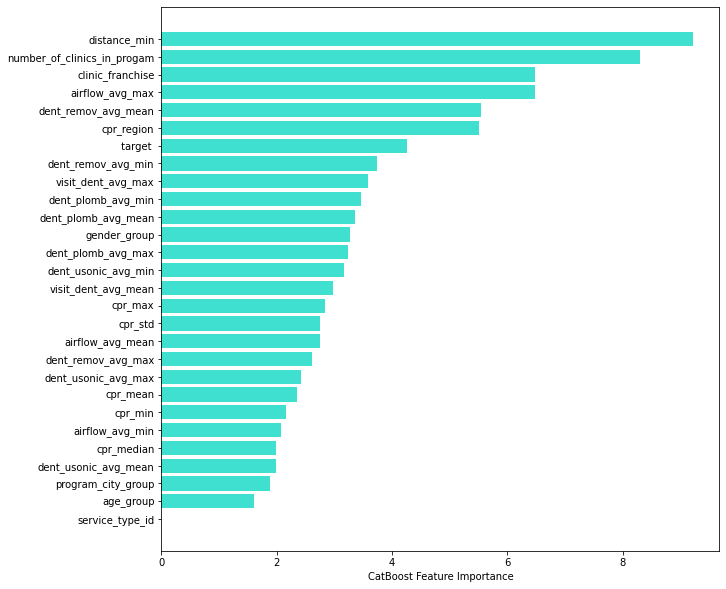

In [35]:
sorted_feature_importance = model_dentistry.feature_importances_.argsort()
plt.barh(dentistry.columns[sorted_feature_importance], 
        model_dentistry.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# **Together**

In [36]:
df = df.fillna(0)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5047 entries, 0 to 5046
Data columns (total 86 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   program_city_group           5047 non-null   float64
 1   age_group                    5047 non-null   int64  
 2   gender_group                 5047 non-null   float64
 3   service_type_id              5047 non-null   int64  
 4   distance_min                 5047 non-null   float64
 5   cpr_max                      5047 non-null   float64
 6   cpr_mean                     5047 non-null   float64
 7   cpr_median                   5047 non-null   float64
 8   cpr_std                      5047 non-null   float64
 9   cpr_min                      5047 non-null   float64
 10  cpr_region                   5047 non-null   float64
 11  number_of_clinics_in_progam  5047 non-null   int64  
 12  clinic_franchise             5047 non-null   float64
 13   target           

In [38]:
X = df.loc[:, df.columns != ' target ']
y = df.loc[:,' target ']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, 
                                                    random_state=42)

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostRegressor(loss_function='RMSE')

In [39]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
        
model.grid_search(grid, train_dataset)

Выходные данные были обрезаны до нескольких последних строк (5000).
61:	learn: 38.1478437	test: 52.9187072	best: 51.4802017 (14)	total: 1.41s	remaining: 3.13s
62:	learn: 38.0586294	test: 52.8905373	best: 51.4802017 (14)	total: 1.47s	remaining: 3.2s
63:	learn: 37.9868153	test: 52.9328878	best: 51.4802017 (14)	total: 1.51s	remaining: 3.21s
64:	learn: 37.7896293	test: 52.9191085	best: 51.4802017 (14)	total: 1.54s	remaining: 3.2s
65:	learn: 37.6572500	test: 52.9267555	best: 51.4802017 (14)	total: 1.57s	remaining: 3.18s
66:	learn: 37.6129703	test: 53.0429519	best: 51.4802017 (14)	total: 1.59s	remaining: 3.15s
67:	learn: 37.5715509	test: 53.0081226	best: 51.4802017 (14)	total: 1.6s	remaining: 3.11s
68:	learn: 37.4742039	test: 53.0266185	best: 51.4802017 (14)	total: 1.62s	remaining: 3.07s
69:	learn: 37.3708300	test: 53.1361091	best: 51.4802017 (14)	total: 1.63s	remaining: 3.03s
70:	learn: 37.2930814	test: 53.1533253	best: 51.4802017 (14)	total: 1.65s	remaining: 3s
71:	learn: 37.2338992	test: 

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [40]:
model.fit(X_train, y_train)

0:	learn: 56.6377336	total: 2.92ms	remaining: 289ms
1:	learn: 55.6723784	total: 6.79ms	remaining: 333ms
2:	learn: 54.8753852	total: 9.73ms	remaining: 314ms
3:	learn: 54.0797735	total: 12.9ms	remaining: 309ms
4:	learn: 53.4918368	total: 16ms	remaining: 303ms
5:	learn: 52.9361711	total: 18.9ms	remaining: 297ms
6:	learn: 52.5238891	total: 22.1ms	remaining: 294ms
7:	learn: 52.0659328	total: 25.3ms	remaining: 290ms
8:	learn: 51.6760117	total: 28.2ms	remaining: 285ms
9:	learn: 51.3262156	total: 32.9ms	remaining: 296ms
10:	learn: 51.0714836	total: 36ms	remaining: 291ms
11:	learn: 50.8390723	total: 38.9ms	remaining: 286ms
12:	learn: 50.6003882	total: 42ms	remaining: 281ms
13:	learn: 50.4000004	total: 45ms	remaining: 276ms
14:	learn: 50.2278756	total: 48.2ms	remaining: 273ms
15:	learn: 50.0064027	total: 51.2ms	remaining: 269ms
16:	learn: 49.7983475	total: 54.2ms	remaining: 265ms
17:	learn: 49.6273664	total: 57.4ms	remaining: 261ms
18:	learn: 49.5163055	total: 60.6ms	remaining: 258ms
19:	learn: 

In [44]:
y_pred = model.predict(X_test)

In [45]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test, y_pred), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test, y_pred), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)), 4))
print("R^2   ", round(metrics.r2_score(y_test, y_pred), 4))
# print('Train Score :', round(model.score(y_pred, y_train) * 100, 4))
# print('Test Score  :', round(model.score(y_pred, y_test) * 100, 4))

MAE:   21.3996
MSE:   1745.8108
RMSE:  41.7829
R^2    -0.1818


Text(0.5, 0, 'CatBoost Feature Importance')

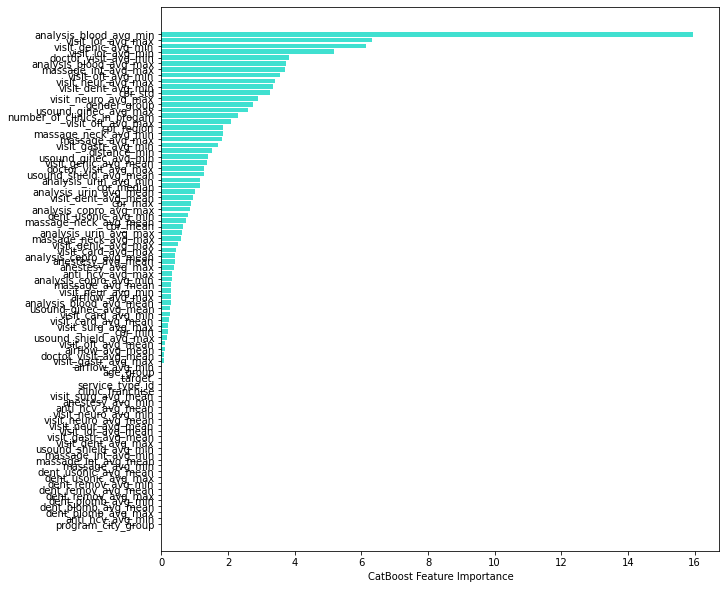

In [46]:
sorted_feature_importance = model.feature_importances_.argsort()
plt.barh(df.columns[sorted_feature_importance], 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

# XGBoost

# **Clinic**

In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import xgboost as xgb

In [48]:
xgb_reg_clinic = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [49]:
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
# evaluate model
scores = cross_val_score(xgb_reg_clinic, X_train_clinic, y_train_clinic, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [50]:
# evaluate an xgboost regression model
from numpy import absolute

In [51]:
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 26.740 (2.840)


In [52]:
xgb_reg_clinic.fit(X_train_clinic, y_train_clinic)

[07:59:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_jobs=2, objectvie='reg:squarederror',
             random_state=42)

In [53]:
y_pred_clinic_xgb = xgb_reg_clinic.predict(X_test_clinic) # Predictions

In [54]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test_clinic, y_pred_clinic_xgb), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test_clinic, y_pred_clinic_xgb), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test_clinic, y_pred_clinic_xgb)), 4))
print("R^2   ", round(metrics.r2_score(y_test_clinic, y_pred_clinic_xgb), 4))
# print('Train Score :', round(model.score(y_pred, y_train) * 100, 4))
# print('Test Score  :', round(model.score(y_pred, y_test) * 100, 4))

MAE:   26.2581
MSE:   3154.2535
RMSE:  56.1627
R^2    0.2486


# **Dentistry**

In [55]:
xgb_reg_dentistry = xgb.XGBRegressor(max_depth=3, n_estimators=100, n_jobs=2,
                           objectvie='reg:squarederror', booster='gbtree',
                           random_state=42, learning_rate=0.05)

In [56]:
xgb_reg_dentistry.fit(X_train_dentistry, y_train_dentistry)

[07:59:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(learning_rate=0.05, n_jobs=2, objectvie='reg:squarederror',
             random_state=42)

In [57]:
y_pred_dentistry_xgb = xgb_reg_dentistry.predict(X_test_dentistry) # Predictions

In [58]:
print("MAE:  ", round(metrics.mean_absolute_error(y_test_dentistry, y_pred_dentistry_xgb), 4))
print("MSE:  ", round(metrics.mean_squared_error(y_test_dentistry, y_pred_dentistry_xgb), 4))
print("RMSE: ", round(np.sqrt(metrics.mean_squared_error(y_test_dentistry, y_pred_dentistry_xgb)), 4))
print("R^2   ", round(metrics.r2_score(y_test_dentistry, y_pred_dentistry_xgb), 4))
# print('Train Score :', round(model.score(y_pred, y_train) * 100, 4))
# print('Test Score  :', round(model.score(y_pred, y_test) * 100, 4))

MAE:   15.8327
MSE:   2435.0609
RMSE:  49.3463
R^2    0.0498
